<a href="https://colab.research.google.com/github/Shinimani/Data_Mining/blob/master/DataMining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading the Libraries

In [0]:
url = "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/10683/220065/compressed/train.csv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1583199225&Signature=JKnrd0PTNySLxtm9Dni9N3GuxGCzxVFZ1IOLRZfB%2FgGiZf448YLwO%2BRXnHEfDoqxjIhu9Cl%2BP9%2FcMaO4R9oUdw2jgr4DcHY8KFrwDuo3FAwSG4G1JlmLCi06VGpoxC578VSAMQrTK%2BiTHzSchs7lVRe%2FLCaM%2FgQQA2Xdvt6gAZ76kXrF0Kh%2B3avP%2BWu1zRj11tCgdJv8PJ87YoOUbH%2BsL2s%2BPEQEg1juyX9Ixlq%2FbctlK3ZX%2FG76MD77RRmPQhNFASIUOub4ZEAVuhDG3DGNpay%2BDIrNIrTXgO3EF%2FPynkCHPkXIGKLSa7rA0xzBDOqT1qy0mujk%2F1m2Wt685%2Fd%2Few%3D%3D&response-content-disposition=attachment%3B+filename%3Dtrain.csv.zip"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time


# Loading 2000000 rows of the data. The actual data is larger.

In [35]:

start = time.time()
data = pd.read_csv(url, nrows = 2000000)
end = time.time()
print("Time taken to load the data is: ",end - start)

print("Shape of data is: ", data.shape)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Time taken to load the data is:  34.74446368217468
Shape of data is:  (2000000, 83)


# Splitting the data into traindata and testdata, equally having 1000000 rows each

In [36]:
traindata = data[0:1000000]
testdata = data[1000000:]
print(traindata.shape)
print(testdata.shape)

(1000000, 83)
(1000000, 83)


In [37]:
traindata.head()

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,Platform,Processor,OsVer,OsBuild,OsSuite,OsPlatformSubRelease,OsBuildLab,SkuEdition,IsProtected,AutoSampleOptIn,PuaMode,SMode,IeVerIdentifier,SmartScreen,Firewall,UacLuaenable,Census_MDC2FormFactor,Census_DeviceFamily,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,...,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_ChassisTypeName,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_PowerPlatformRoleName,Census_InternalBatteryType,Census_InternalBatteryNumberOfCharges,Census_OSVersion,Census_OSArchitecture,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_IsPortableOperatingSystem,Census_GenuineStateName,Census_ActivationChannel,Census_IsFlightingInternal,Census_IsFlightsDisabled,Census_FlightRing,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0000028988387b115f69f31a3bf04f09,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,29,128035.0,18.0,35.0,171,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,NaN,0.0,137.0,NaN,1.0,1.0,Desktop,Windows.Desktop,2668.0,9124.0,4.0,5.0,...,HDD,299451.0,0,4096.0,Desktop,18.9,1440.0,900.0,Desktop,NaN,4.294967e+09,10.0.17134.165,amd64,rs4_release,17134,165,Professional,PROFESSIONAL,UUPUpgrade,26.0,119,UNKNOWN,0,IS_GENUINE,Retail,NaN,0.0,Retail,NaN,628.0,36144.0,0,NaN,0.0,0,0,0.0,0.0,10.0,0
1,000007535c3f730efa9ea0b7ef1bd645,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,93,1482.0,18.0,119.0,64,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,NaN,0.0,137.0,NaN,1.0,1.0,Notebook,Windows.Desktop,2668.0,91656.0,4.0,5.0,...,HDD,102385.0,0,4096.0,Notebook,13.9,1366.0,768.0,Mobile,NaN,1.000000e+00,10.0.17134.1,amd64,rs4_release,17134,1,Professional,PROFESSIONAL,IBSClean,8.0,31,UNKNOWN,0,OFFLINE,Retail,NaN,0.0,NOT_SET,NaN,628.0,57858.0,0,NaN,0.0,0,0,0.0,0.0,8.0,0
2,000007905a28d863f6d0d597892cd692,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,86,153579.0,18.0,64.0,49,windows10,x64,10.0.0.0,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,1.0,0,NaN,0.0,137.0,RequireAdmin,1.0,1.0,Desktop,Windows.Desktop,4909.0,317701.0,4.0,5.0,...,SSD,113907.0,0,4096.0,Desktop,21.5,1920.0,1080.0,Desktop,NaN,4.294967e+09,10.0.17134.165,amd64,rs4_release,17134,165,Core,CORE,UUPUpgrade,7.0,30,FullAuto,0,IS_GENUINE,OEM:NONSLP,NaN,0.0,Retail,NaN,142.0,52682.0,0,NaN,0.0,0,0,0.0,0.0,3.0,0
3,00000b11598a75ea8ba1beea8459149f,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,88,20710.0,NaN,117.0,115,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,NaN,0.0,137.0,ExistsNotSet,1.0,1.0,Desktop,Windows.Desktop,1443.0,275890.0,4.0,5.0,...,UNKNOWN,227116.0,0,4096.0,MiniTower,18.5,1366.0,768.0,Desktop,NaN,4.294967e+09,10.0.17134.228,amd64,rs4_release,17134,228,Professional,PROFESSIONAL,UUPUpgrade,17.0,64,FullAuto,0,IS_GENUINE,OEM:NONSLP,NaN,0.0,Retail,NaN,355.0,20050.0,0,NaN,0.0,0,0,0.0,0.0,3.0,1
4,000014a5f00daa18e76b81417e

In [38]:
testdata.head()

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,Platform,Processor,OsVer,OsBuild,OsSuite,OsPlatformSubRelease,OsBuildLab,SkuEdition,IsProtected,AutoSampleOptIn,PuaMode,SMode,IeVerIdentifier,SmartScreen,Firewall,UacLuaenable,Census_MDC2FormFactor,Census_DeviceFamily,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,...,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_ChassisTypeName,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_PowerPlatformRoleName,Census_InternalBatteryType,Census_InternalBatteryNumberOfCharges,Census_OSVersion,Census_OSArchitecture,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_IsPortableOperatingSystem,Census_GenuineStateName,Census_ActivationChannel,Census_IsFlightingInternal,Census_IsFlightsDisabled,Census_FlightRing,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
1000000,1cb967ed7f684821466802667a3398bd,win8defender,1.1.15200.1,4.18.1807.18075,1.275.938.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,171,124736.0,NaN,211.0,182,windows10,x64,10.0.0.0,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,1.0,0,NaN,0.0,137.0,NaN,1.0,1.0,Desktop,Windows.Desktop,4589.0,313586.0,4.0,5.0,...,SSD,113858.0,0,4096.0,Desktop,21.5,1920.0,1080.0,Desktop,NaN,4.294967e+09,10.0.17134.254,amd64,rs4_release,17134,254,Core,CORE,IBSClean,29.0,125,FullAuto,0,IS_GENUINE,OEM:NONSLP,NaN,0.0,Retail,NaN,142.0,11216.0,0,NaN,0.0,0,0,0.0,0.0,3.0,0
1000001,1cb968e7627269748e617759da0002bf,win8defender,1.1.15100.1,4.18.1806.18062,1.273.488.0,0,7.0,0,NaN,48510.0,2.0,1.0,1,29,95010.0,NaN,35.0,171,windows10,x64,10.0.0.0,14393,768,rs1,14393.2189.amd64fre.rs1_release.180329-1711,Home,1.0,0,NaN,0.0,98.0,RequireAdmin,1.0,1.0,Notebook,Windows.Desktop,4395.0,273338.0,2.0,5.0,...,HDD,466913.0,0,4096.0,Notebook,14.0,1366.0,768.0,Mobile,lion,0.000000e+00,10.0.14393.2189,amd64,rs1_release,14393,2189,CoreSingleLanguage,CORE_SINGLELANGUAGE,Update,26.0,119,FullAuto,0,IS_GENUINE,Retail,0.0,0.0,Retail,0.0,142.0,4357.0,1,0.0,0.0,0,0,0.0,1.0,10.0,1
1000002,1cb969ba01ffa4f7e3f1efbb614a84f2,win8defender,1.1.15200.1,4.13.17134.1,1.275.1769.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,201,66202.0,27.0,267.0,251,windows10,x64,10.0.0.0,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,1.0,0,NaN,0.0,137.0,NaN,1.0,1.0,Notebook,Windows.Desktop,2230.0,253149.0,2.0,5.0,...,SSD,29252.0,0,3072.0,Laptop,13.3,1920.0,1080.0,Mobile,NaN,0.000000e+00,10.0.17134.1,amd64,rs4_release,17134,1,CoreSingleLanguage,CORE_SINGLELANGUAGE,IBSClean,35.0,148,UNKNOWN,0,IS_GENUINE,OEM:DM,NaN,0.0,NOT_SET,NaN,142.0,43534.0,0,NaN,0.0,0,0,0.0,0.0,11.0,1
1000003,1cb96d2ff2bbb72ac9e46851098cd406,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1380.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,88,20710.0,27.0,117.0,115,windows10,x64,10.0.0.0,16299,768,rs3,16299.431.amd64fre.rs3_release_svc_escrow.1805...,Home,1.0,0,NaN,0.0,117.0,RequireAdmin,1.0,1.0,Notebook,Windows.Desktop,585.0,189830.0,4.0,5.0,...,SSD,108182.0,1,4096.0,Notebook,13.4,1920.0,1080.0,Mobile,lion,0.000000e+00,10.0.16299.547,amd64,rs3_release_svc_escrow,16299,547,Core,CORE,Update,8.0,31,AutoInstallAndRebootAtMaintenanceTime,0,IS_GENUINE,Retail,0.0

# The basic info about our traindata

In [39]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 83 columns):
MachineIdentifier                                    1000000 non-null object
ProductName                                          1000000 non-null object
EngineVersion                                        1000000 non-null object
AppVersion                                           1000000 non-null object
AvSigVersion                                         1000000 non-null object
IsBeta                                               1000000 non-null int64
RtpStateBitfield                                     996334 non-null float64
IsSxsPassiveMode                                     1000000 non-null int64
DefaultBrowsersIdentifier                            48303 non-null float64
AVProductStatesIdentifier                            995907 non-null float64
AVProductsInstalled                                  995907 non-null float64
AVProductsEnabled                           

# Distribution of Data

Looking at the distribution of data with respect to the class label

Positive detections:  499813
Negative detections:  500187


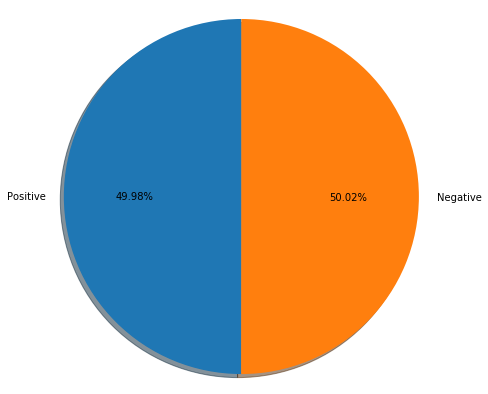

In [40]:
positives = (traindata["HasDetections"]==1).sum()
negatives = (traindata["HasDetections"]==0).sum()
print("Positive detections: ", positives)
print("Negative detections: ", negatives)

labelsForPie1 = ['Positive','Negative']
sizesForPie1 = [positives,negatives]
fig1, ax1 = plt.subplots(figsize=(7,7))
ax1.pie(sizesForPie1, labels=labelsForPie1, autopct='%1.2f%%',shadow=True, startangle=90)
#To add percentages to each of the constitutents of the pie chart, we add in the line, autopct
#1.2f for getting percentages upto hundredths place
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Looking at the distribution of missing values in the dataset

In [41]:
missingCounts=[]
missingPercent =[]
totalvalues=traindata.shape[0]

for col in traindata:
  temp = traindata[col].isnull().sum()
  missingCounts.append(temp)
  missingPercent.append(temp/totalvalues*100)

missingInfo = pd.DataFrame({"Attribute Name":traindata.columns,"Missing Count": missingCounts, "Missing Percent": missingPercent})
#looking at the attributes with missing values
missingInfo[missingInfo["Missing Count"]!=0].reset_index(drop=True).sort_values("Missing Count", ascending=False)


,Attribute Name,Missing Count,Missing Percent
10,PuaMode,999738,99.9738
21,Census_ProcessorClass,995875,99.5875
1,DefaultBrowsersIdentifier,951697,95.1697
34,Census_IsFlightingInternal,830157,83.0157
31,Census_InternalBatteryType,709830,70.9830
36,Census_ThresholdOptIn,634570,63.4570
39,Census_IsWIMBootEnabled,633713,63.3713
13,SmartScreen,355777,35.5777
6,OrganizationIdentifier,308936,30.8936
11,SMode,59902,5.9902


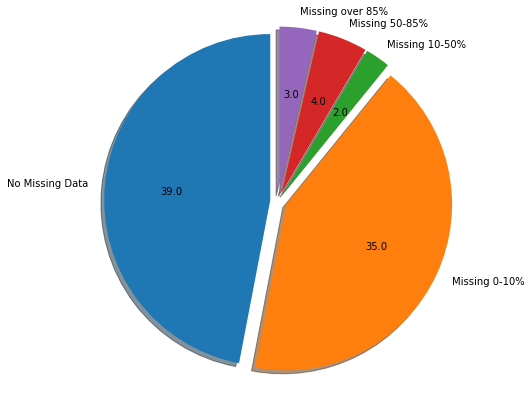

In [42]:
no_missing_col_count = (missingInfo["Missing Percent"]==0).sum()
zero_to_10_count = ((missingInfo["Missing Percent"]!=0) & (missingInfo["Missing Percent"]<=10)).sum()
ten_to_50_count = ((missingInfo["Missing Percent"]>10) & (missingInfo["Missing Percent"]<=50)).sum()
fifty_to_85_count = ((missingInfo["Missing Percent"]>50) & (missingInfo["Missing Percent"]<=85)).sum()
more_than_85 = (missingInfo["Missing Percent"]>85).sum()


labelsForPie2 = ['No Missing Data','Missing 0-10%','Missing 10-50%','Missing 50-85%', 'Missing over 85%']
sizesForPie2 = [no_missing_col_count,zero_to_10_count,ten_to_50_count,fifty_to_85_count,more_than_85]
explode = (0.05, 0.05, 0.05, 0.05, 0.05)
fig2, ax2 = plt.subplots(figsize=(7,7))


def absolute_value(val):
    a  = np.round(val/100*83)
    return a
ax2.pie(sizesForPie2, labels=labelsForPie2, autopct=absolute_value,shadow=True, startangle=90,explode=explode)
#To add values to each of the constitutents of the pie chart
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Finding the droppable attributes

In [31]:
print("The Attributes with more than 85% missing values are:\n\n")
miss85 = missingInfo[missingInfo['Missing Percent']>85]

miss85


The Attributes with more than 85% missing values are:




,Attribute Name,Missing Count,Missing Percent


Finding the list of good columns, which have less than 15% of their values missing

In [28]:
# good_columns = list(traindata.columns)
# for col in missingInfo:
#   if col['Missing Percent']>85:
#     good_columns.remove(col['Attribute Name'])
good_columns = missingInfo[missingInfo['Missing Percent']<85]
good_columns = good_columns['Attribute Name'].reset_index(drop=True)
good_columns = list(good_columns)
print(good_columns)

['Census_IsFlightingInternal', 'Census_InternalBatteryType', 'Census_ThresholdOptIn', 'Census_IsWIMBootEnabled', 'SmartScreen', 'OrganizationIdentifier', 'SMode', 'CityIdentifier', 'Wdft_IsGamer', 'Wdft_RegionIdentifier', 'Census_InternalBatteryNumberOfCharges', 'Census_FirmwareManufacturerIdentifier', 'Census_FirmwareVersionIdentifier', 'Census_IsFlightsDisabled', 'Census_OEMModelIdentifier', 'Census_OEMNameIdentifier', 'Firewall', 'Census_TotalPhysicalRAM', 'Census_IsAlwaysOnAlwaysConnectedCapable', 'Census_OSInstallLanguageIdentifier', 'IeVerIdentifier', 'Census_PrimaryDiskTotalCapacity', 'Census_SystemVolumeTotalCapacity', 'Census_InternalPrimaryDiagonalDisplaySizeInInches', 'Census_InternalPrimaryDisplayResolutionHorizontal', 'Census_InternalPrimaryDisplayResolutionVertical', 'Census_ProcessorModelIdentifier', 'Census_ProcessorManufacturerIdentifier', 'Census_ProcessorCoreCount', 'AVProductStatesIdentifier', 'AVProductsInstalled', 'AVProductsEnabled', 'IsProtected', 'RtpStateBitfi

Finding the Skewness of data

In [29]:
skewness = []
# stats = []
for col in traindata.columns:
    skewness.append((col,traindata[col].nunique(),traindata[col].value_counts(normalize=True, dropna=False).values[0] * 100, traindata[col].dtype))
    # stats.append((col, train[col].nunique(), train[col].isnull().sum() * 100 / train.shape[0], train[col].value_counts(normalize=True, dropna=False).values[0] * 100, train[col].dtype))
    
skewness = pd.DataFrame(skewness, columns=['Attribute Name', '# of Unique values', '% in the biggest category', 'type'])
skewness.sort_values('% in the biggest category', ascending=False).reset_index()

,index,Attribute Name,# of Unique values,% in the biggest category,type
0,60,IsBeta,2,99.9993,int64
1,72,AutoSampleOptIn,2,99.9969,int64
2,45,Census_IsPortableOperatingSystem,2,99.9410,int64
3,74,Census_DeviceFamily,3,99.8368,object
4,36,UacLuaenable,6,99.2776,float64
...,...,...,...,...,...
75,26,Census_ProcessorModelIdentifier,2513,3.2433,float64
76,12,Census_FirmwareVersionIdentifier,29161,1.7888,float64
77,59,AvSigVersion,7353,1.1576,object
78,22,Census_SystemVolumeTotalCapacity,212928,0.5881,float64


In [30]:
#In the above blocks I have made a list of good_columns, which contains the columns having more than 85%values missing rmeoved.
#Now to get traindata restricted to the good_columns, this code will work
traindata = traindata[good_columns]
traindata

,Census_IsFlightingInternal,Census_InternalBatteryType,Census_ThresholdOptIn,Census_IsWIMBootEnabled,SmartScreen,OrganizationIdentifier,SMode,CityIdentifier,Wdft_IsGamer,Wdft_RegionIdentifier,Census_InternalBatteryNumberOfCharges,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsFlightsDisabled,Census_OEMModelIdentifier,Census_OEMNameIdentifier,Firewall,Census_TotalPhysicalRAM,Census_IsAlwaysOnAlwaysConnectedCapable,Census_OSInstallLanguageIdentifier,IeVerIdentifier,Census_PrimaryDiskTotalCapacity,Census_SystemVolumeTotalCapacity,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_ProcessorModelIdentifier,Census_ProcessorManufacturerIdentifier,Census_ProcessorCoreCount,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,IsProtected,RtpStateBitfield,Census_IsVirtualDevice,Census_PrimaryDiskTypeName,UacLuaenable,Census_ChassisTypeName,GeoNameIdentifier,Census_PowerPlatformRoleName,OsBuildLab,Census_OSInstallTypeName,Census_OSSkuName,Census_OSWUAutoUpdateOptionsName,Census_OSUILocaleIdentifier,Census_IsPortableOperatingSystem,Census_IsPenCapable,Census_OSBuildRevision,Census_GenuineStateName,Census_ActivationChannel,Census_IsTouchEnabled,Census_FlightRing,Census_IsSecureBootEnabled,Census_OSEdition,MachineIdentifier,Census_OSBuildNumber,OsVer,EngineVersion,AppVersion,AvSigVersion,IsBeta,IsSxsPassiveMode,HasTpm,CountryIdentifier,LocaleEnglishNameIdentifier,Platform,Processor,OsBuild,Census_OSBranch,OsSuite,OsPlatformSubRelease,SkuEdition,AutoSampleOptIn,Census_MDC2FormFactor,Census_DeviceFamily,ProductName,Census_HasOpticalDiskDrive,Census_OSVersion,Census_OSArchitecture,HasDetections
0,NaN,NaN,NaN,NaN,NaN,18.0,0.0,128035.0,0.0,10.0,4.294967e+09,628.0,36144.0,0.0,9124.0,2668.0,1.0,4096.0,0.0,26.0,137.0,476940.0,299451.0,18.9,1440.0,900.0,2341.0,5.0,4.0,53447.0,1.0,1.0,1.0,7.0,0.0,HDD,1.0,Desktop,35.0,Desktop,17134.1.amd64fre.rs4_release.180410-1804,UUPUpgrade,PROFESSIONAL,UNKNOWN,119,0,0,165,IS_GENUINE,Retail,0,Retail,0,Professional,0000028988387b115f69f31a3bf04f09,17134,10.0.0.0,1.1.15100.1,4.18.1807.18075,1.273.1735.0,0,0,1,29,171,windows10,x64,17134,rs4_release,256,rs4,Pro,0,Desktop,Windows.Desktop,win8defender,0,10.0.17134.165,amd64,0
1,NaN,NaN,NaN,NaN,NaN,18.0,0.0,1482.0,0.0,8.0,1.000000e+00,628.0,57858.0,0.0,91656.0,2668.0,1.0,4096.0,0.0,8.0,137.0,476940.0,102385.0,13.9,1366.0,768.0,2405.0,5.0,4.0,53447.0,1.0,1.0,1.0,7.0,0.0,HDD,1.0,Notebook,119.0,Mobile,17134.1.amd64fre.rs4_release.180410-1804,IBSClean,PROFESSIONAL,UNKNOWN,31,0,0,1,OFFLINE,Retail,0,NOT_SET,0,Professional,000007535c3f730efa9ea0b7ef1bd645,17134,10.0.0.0,1.1.14600.4,4.13.17134.1,1.263.48.0,0,0,1,93,64,windows10,x64,17134,rs4_release,256,rs4,Pro,0,Notebook,Windows.Desktop,win8defender,0,10.0.17134.1,amd64,0
2,NaN,NaN,NaN,NaN,RequireAdmin,18.0,0.0,153579.0,0.0,3.0,4.294967e+09,142.0,52682.0,0.0,317701.0,4909.0,1.0,4096.0,0.0,7.0,137.0,114473.0,113907.0,21.5,1920.0,1080.0,1972.0,5.0,4.0,53447.0,1.0,1.0,1.0,7.0,0.0,SSD,1.0,Desktop,64.0,Desktop,17134.1.amd64fre.rs4_release.180410-1804,UUPUpgrade,CORE,FullAuto,30,0,0,165,IS_GENUINE,OEM:NONSLP,0,Retail,0,Core,000007905a28d863f6d0d597892cd692,17134,10.0.0.0,1.1.15100.1,4.18.1807.18075,1.273.1341.0,0,0,1,86,49,windows10,x64,17134,rs4_release,768,rs4,Home,0,Desktop,Windows.Desktop,win8defender,0,10.0.17134.165,amd64,0
3,NaN,NaN,NaN,NaN,ExistsNotSet,NaN,0.0,20710.0,0.0,3.0,4.294967e+09,355.0,20050.0,0.0,275890.0,1443.0,1.0,4096.0,0.0,17.0,137.0,238475.0,227116.0,18.5,1366.0,768.0,2273.0,5.0,4.0,53447.0,1.0,1.0,1.0,7.0,0.0,UNKNOWN,1.0,MiniTower,117.0,Desktop,17134.1.amd64fre.rs4_release.180410-1804,UUPUpgrade,PROFESSIONAL,FullAuto,64,0,0,228,IS_GENUINE,OEM:NONSLP,0,Retail,0,Professional,00000b11598a75ea8ba1beea8459149f,17134,10.0.0.0,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0,0,1,88,115,windows10,x64,17134,rs4_release,256,rs4,Pro,0,Desktop,Windows.Desktop,win8defender,0,10.0.1713

Graph Plot of all non-categorical features scaled to 0 to 1